In [21]:
import matplotlib.pyplot as plt
import json
import pandas as pd

In [22]:
config_file = "experiment_results_16_concepts.json"
with open(config_file) as json_file:
    results = json.load(json_file)

# experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage']
# experiments = ['softCBM', 'latentCBM', 'sequentialLeakage', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage']
experiments = ['sequentialCBM', 'sequentialLatentCBM', 'sequentialLeakage', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
headers = ["Method", "Loss", "Label Accuracy", "Label Loss", "Concept Accuracy", "Concept Loss", "Latent Loss"]
expr_results = []
for expr in experiments:
    expr_result = [expr]
    expr_result.extend(list(results[expr]['results'].values()))
    expr_results.append(expr_result)

In [23]:
df = pd.DataFrame.from_records(expr_results, columns=headers)
display(df)

,Method,Loss,Label Accuracy,Label Loss,Concept Accuracy,Concept Loss,Latent Loss
0,sequentialCBM,0.265294,0.443226,0.073624,0.976984,0.000192,0.000000
1,sequentialLatentCBM,0.000455,0.718323,0.000255,0.976726,0.000200,0.000000
2,sequentialLeakage,0.011638,0.742968,0.000005,0.975435,0.000216,0.011416
3,hardSequentialLeakage,0.011621,0.720129,0.000267,0.976952,0.000194,0.011161
4,hardSequentialLatentCBM,0.000219,0.731097,0.000024,0.977726,0.000196,0.000000


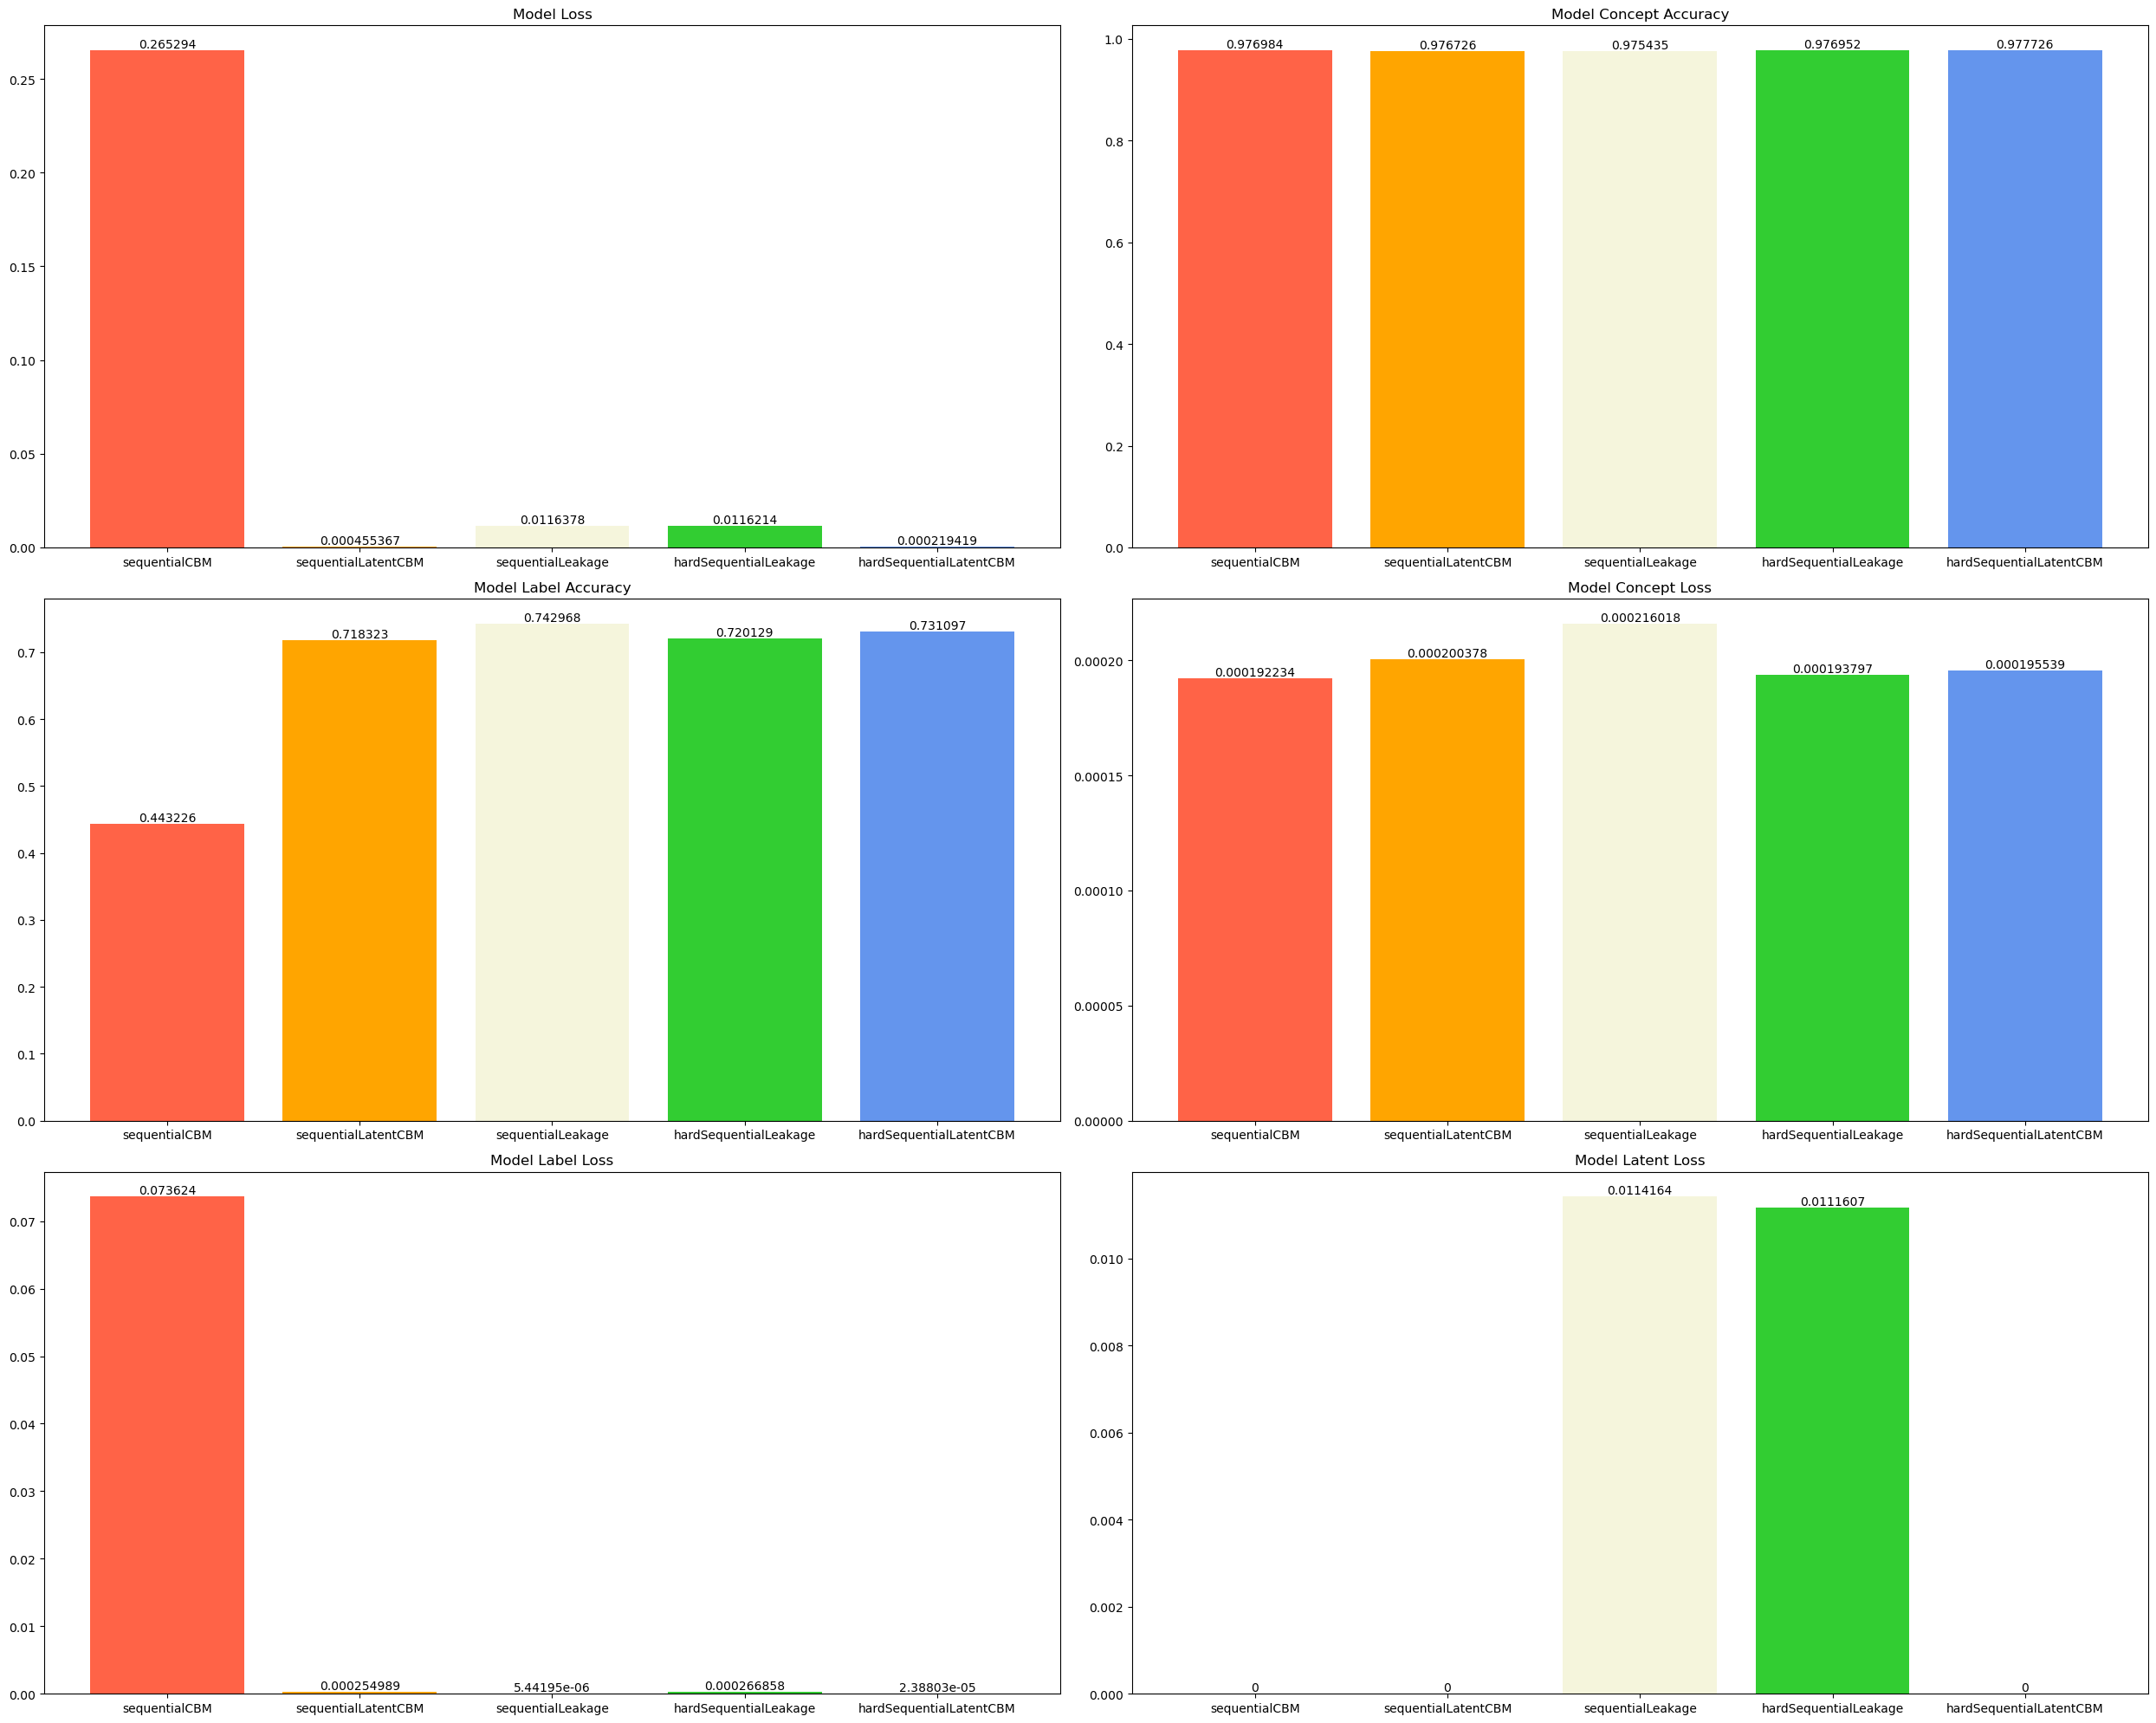

In [24]:
# plt.figure(figsize=(10,30))
fig, axs = plt.subplots(3, 2, figsize=(25, 20))
colors = ['tomato', 'orange', 'beige', 'limegreen', 'cornflowerblue', 'mediumpurple', 'pink']
for i in range(1, len(headers)):
    bar = axs[(i-1)%3, (i-1)//3].bar(experiments, df[headers[i]], color=colors)
    axs[(i-1)%3, (i-1)//3].set_title(f"Model {headers[i]}")
    axs[(i-1)%3, (i-1)//3].bar_label(bar, label_type='edge')
plt.tight_layout()
plt.show()
